In [2]:
import numpy as np 
import os 
import pandas as pd 
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler 
from transformers import * 
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

/opt/conda/lib/python3.8/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [2]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv") 

In [3]:
train

,id,text,summary
0,REPORT-news_r-00007-00001,보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오...,국민통합연대가 연 창립대회에 자유한국당 홍 전 대표 등 의원 20여 명을 포함한 5...
1,REPORT-news_r-00018-00001,가난 속에서 맨손으로 혼자 창업해 30대 중반에 코스닥 상장까지 일궈낸 이가 있다....,아이엘사이언스 대표 송 씨는 발광다이오드 조명용 실리콘 렌즈를 세계 최초로 개발하여...
2,REPORT-news_r-00020-00002,"SK텔레콤은 ‘T끼리 온가족 할인’ 요금제로, 가족 구성원의 가입 합산 기간이...",SK텔레콤은 T끼리 온가족 할인으로 요금을 깎아주거나 30년 이상 가입자를 위해 호...
3,REPORT-news_r-00024-00001,“박스 테이프는 어디 갔죠?” 1일 오전 서울 중구의 한 대형마트.\n 장을 본 ...,대형마트 3사가 장바구니 사용을 독려하고 플라스틱 폐기물을 줄이기 위해 포장용 테이...
4,REPORT-news_r-00029-00001,"현대차그룹 고급 브랜드 제네시스의 첫 스포츠유틸리티차량(SUV), GV80이 드디어...",현대차그룹은 제네시스를 이끌 GV80의 내·외관 사진을 공개하며 이달 중 출시한다고...
...,...,...,...
40395,REPORT-speech-16815-00004,이것들이 잘할 수 있도록 저희들이 워크숍을 예정하는데 한국고용정보원하고 한국청소년정...,전국기능경기대회는 심각한 코로나 상황으로 인해 방역에 특히 신경을 써서 추진하고자 한다.
40396,REPORT-speech-16815-00005,그래서 10~12월간 제조업체 등을 대상으로 해서 관련된 자율진단을 하고 필요하면 ...,이륜차 사고예방 시범사업은 이동시간 논란이 많은 배달업 종사원들에 대해 안전 배달시...
40397,REPORT-speech-16817-00002,마지막으로 10월 4일에는 슈타인 마이어 독일 연방정부 대통령을 예방합니다. 이 자...,강원도 철원군에서 2021년 통일로가요 결선 경연을 개최하며 결선에 진출한 12개 ...
40398,REPORT-speech-16819-00001,안녕하십니까? 국민권익위원회 대변인 허재우입니다. 9월 넷째 주 정례브리핑입니다. ...,국민권익위는 경기도 소재 21개 중·고등학교를 표본으로 실태조사를 한 결과 저소득층...


In [4]:
test

,id,text
0,xAqIHdvEZG,‘서울시 성평등 어린이사전’ 보니 “여자는 얌전해야 해” “남자니까 씩씩해야지” “...
1,zWSR9EQhrG,정부가 신종 코로나바이러스 감염증(코로나19) 여파로 직격탄을 맞은 사회적 취약계층...
2,FdCwnykWkd,창원 경상대병원에서 간호사들이 의사로부터 수년간 폭언과 폭행을 당했다는 진정이 고용...
3,vBwAKwGXHz,"또한, 열량에 있어서도 오렌지 주스의 평균 열량은 87.41kcal, 혼합 주스의 ..."
4,dDkXHmhxN9,이재민 자녀는 아니더라도 심리적인 요인 등으로 안전한 학습장소에서 공부를 희망하는 ...
...,...,...
495,UZt8k9n0Z6,또 접근매체가 분실 또는 도난당한 경우는 서면으로 신고하게 하거나 아니면 직접 대면...
496,Lg1fQG5DpJ,18세 이하의 감염경로에 대해서 말씀드리겠습니다. 12세 이하의 어린이의 경우 부모...
497,UHZEucimy0,"김현미 위원] ""그런데 저는 이렇게 조기 집행을 하는 이 방식 자체가 실제적으로 경..."
498,hH1fi1JTUi,(전진석 학생지원국장) 이 부분은 우리 평가원에서 답변해주시겠습니까? <답변> (...


In [12]:
train_texts = train["text"].values  
test_texts = test["text"].values 

tokenizer = AutoTokenizer.from_pretrained("gogamza/kobart-base-v2")

lens = []

for i in tqdm(range(len(train_texts))): 
    lens.append(len(tokenizer.tokenize(train_texts[i])))

Could not locate the tokenizer configuration file, will try to use the model config instead.


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gogamza--kobart-base-v2/snapshots/f9f2ec35d3c32a1ecc7a3281f9626b7ec1913fed/config.json
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
Model config BartConfig {
  "_name_or_path": "gogamza/kobart-base-v2",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.0,
  "author": "Heewon Jeon(madjakarta@gmail.com)",
  "bos_token_id": 1,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.1,
  "d_model": 768,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 3072,
  "en

loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gogamza--kobart-base-v2/snapshots/f9f2ec35d3c32a1ecc7a3281f9626b7ec1913fed/tokenizer.json
loading file added_tokens.json from cache at /root/.cache/huggingface/hub/models--gogamza--kobart-base-v2/snapshots/f9f2ec35d3c32a1ecc7a3281f9626b7ec1913fed/added_tokens.json
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--gogamza--kobart-base-v2/snapshots/f9f2ec35d3c32a1ecc7a3281f9626b7ec1913fed/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gogamza--kobart-base-v2/snapshots/f9f2ec35d3c32a1ecc7a3281f9626b7ec1913fed/config.json
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
Model config BartConfig {
  "_name_or_path": "gogamza/kobart-base-v2",
  "activation_d

  0%|          | 0/40400 [00:00<?, ?it/s]

In [13]:
np.max(lens), np.min(lens), np.mean(lens) 

(728, 234, 381.3301237623762)

In [15]:
pnls = [-5.918, 4.3485, 6.6188, -1.3177, -0.8793, 0.8011, -2.8997, 0.8236, 
        4.0749, 2.8133, 1.9742, 4.4448, 7.5866, 2.6792, 8.4933, 12.6465] 



In [18]:
start_amount = 371 - np.sum(pnls) 
start_amount

324.7099

In [19]:
len(pnls)

16

In [4]:
import ccxt 

bybit = ccxt.bybit() 

df = bybit.fetch_ohlcv("BTCUSDT", timeframe="4h") 

df = pd.DataFrame(df) 

close_prices = df[4].values[-18:-1]

In [5]:
close_prices 

array([27350. , 27443.2, 27220. , 27324.4, 26898.2, 27190.2, 26964.9,
       27154.9, 27546. , 28244.9, 27962.1, 27270.1, 28171.1, 28177.4,
       27684. , 27769.9, 27703.6])

In [6]:
close_prices = close_prices[-5:] 
close_prices

array([28171.1, 28177.4, 27684. , 27769.9, 27703.6])

In [7]:
ret = [] 


for i in range(1, len(close_prices)): 
    r = close_prices[i] / close_prices[i-1] 
    ret.append(r) 

In [8]:
ret 

[1.000223633439944, 0.9824895128720179, 1.0031028753070366, 0.9976125229114976]

In [15]:
gamma = 0.06 
start_amount = 339.78673630051406 
bah_rets = [start_amount] 
cur_amount = start_amount
for i in range(len(ret)): 
    cur_ret = cur_amount * ret[i] * (1-gamma/100) * (1-gamma/100) 
    bah_rets.append(cur_ret) 
    cur_amount = cur_ret


In [10]:
pnls = [-1.4122, 5.4905, 0.8698, -1.5076]

cbits_rets = [start_amount] 
cur_amount = start_amount 

for i in range(len(pnls)): 
    cur_ret = cur_amount + pnls[i] 
    cbits_rets.append(cur_ret) 
    cur_amount = cur_ret 

In [16]:
cbits_rets, bah_rets

([371, 369.5878, 375.0783, 375.9481, 374.4405],
 [339.78673630051406,
  339.45501105900826,
  333.1108953351375,
  333.74364380250853,
  332.54742215415916])

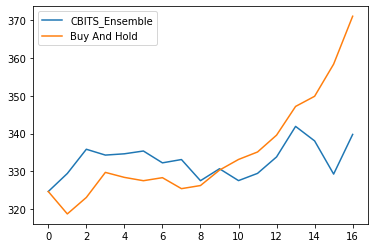

In [49]:
plt.plot(bah_rets, label="CBITS_Ensemble")
plt.plot(cbits_rets, label="Buy And Hold")
plt.legend()

In [54]:
bah_rets, np.max(bah_rets), np.min(bah_rets)

([324.7099,
  329.4696523437864,
  335.86851337908655,
  334.32867806058357,
  334.66913781699765,
  335.4067319495814,
  332.27971974452146,
  333.15400550999294,
  327.56411139388916,
  330.7228389829918,
  327.58898431796695,
  329.5014829410178,
  333.8461706430732,
  341.90589405913437,
  338.0765289966346,
  329.3143510488885,
  339.78673630051406],
 341.90589405913437,
 324.7099)

In [55]:
cbits_rets, np.max(cbits_rets), np.min(cbits_rets)

([324.7099,
  318.7919,
  323.1404,
  329.7592,
  328.4415,
  327.5622,
  328.36330000000004,
  325.46360000000004,
  326.28720000000004,
  330.36210000000005,
  333.1754000000001,
  335.1496000000001,
  339.59440000000006,
  347.18100000000004,
  349.8602,
  358.3535,
  371.0],
 371.0,
 318.7919)

# For Updates

Update every day 

every day at 9pm 

In [17]:
last_close = 27703.6 
bah_start_amount = 332.54742215415916
cbits_start_amount = 374.4405 

In [18]:
# get close 
import ccxt 
bybit = ccxt.bybit() 
df = bybit.fetch_ohlcv("BTCUSDT", timeframe="4h") 
df = pd.DataFrame(df) 
# close_prices = df[4].values[-18:-1]